# 🎵 Análisis de Datos de Spotify
Este notebook explica **cajas y bigotes, boxplots, correlación y mapas de calor**
usando el dataset de `spotify_tracks.csv`.

Incluye ejemplos en Python con **Pandas, Matplotlib y Seaborn**.

In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

In [4]:
# 📂 Cargar dataset de Facebook Marketplace desde la carpeta Datasources
from pathlib import Path
data_path = Path("Facebook_Marketplace_data.csv")
if data_path.exists():
    df = pd.read_csv(data_path)
    display(df.head())
    print(f"Archivo cargado desde: {data_path}")
else:
    print("⚠️ No se encontró el archivo en:")
    print(data_path)
    print("Verifica la ruta o el nombre del archivo.")

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Archivo cargado desde: Facebook_Marketplace_data.csv


In [5]:
# Listar columnas del DataFrame para validar nombres
print(df.columns.tolist())

['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']


In [6]:
# 🔧 Preprocesamiento: limpiar y crear nuevas columnas
import numpy as np
df_clean = df.copy()
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean['percentage_likes'] = df_clean['num_likes'] * 100 / df_clean['num_reactions']
# Orden de géneros por mediana de duración y popularidad
order_by_reactions = df_clean.groupby('status_type')['num_reactions'].median().sort_values(ascending=False).index
print('Columnas finales:', df_clean.columns.tolist())
print('Géneros (top 5 por reacciones):', list(order_by_reactions)[:5])

Columnas finales: ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4', 'percentage_likes']
Géneros (top 5 por reacciones): ['video', 'status', 'link', 'photo']


## 1️⃣ Cajas y Bigotes
Las cajas y bigotes permiten **detectar la dispersión y los valores atípicos**.
- Caja = rango intercuartílico (Q1–Q3)
- Línea = mediana (Q2)
- Bigotes = datos dentro de 1.5 × IQR
- Puntos = valores atípicos (outliers)

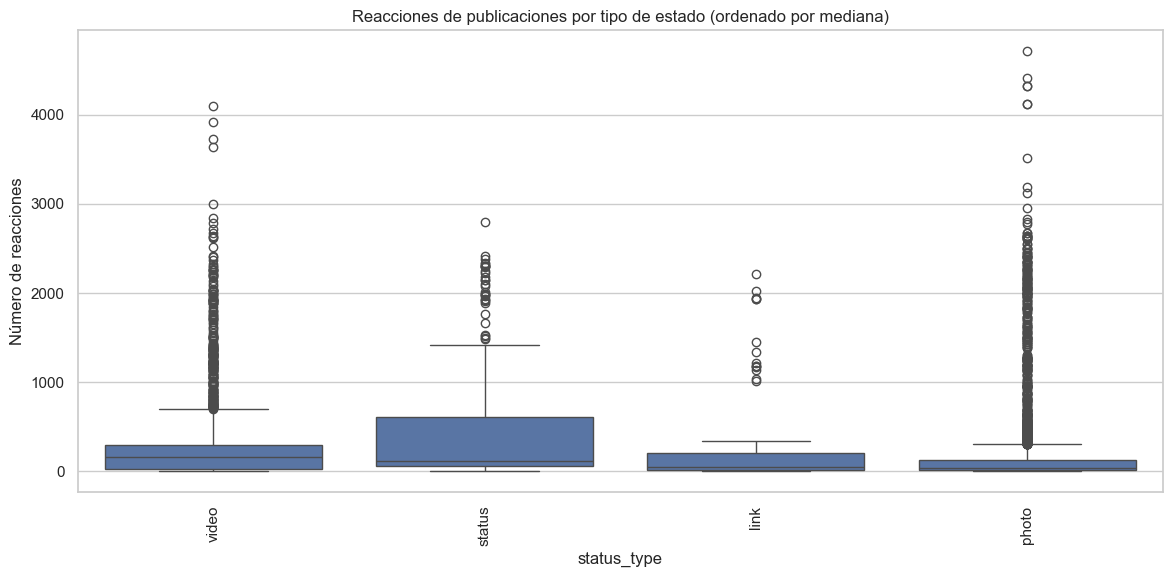

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean, x="status_type", y="num_reactions", order=order_by_reactions)
plt.title("Reacciones de publicaciones por tipo de estado (ordenado por mediana)")
plt.xticks(rotation=90)
plt.ylabel("Número de reacciones")
plt.show()

## 2️⃣ Boxplots
Un boxplot se utiliza para **comparar distribuciones entre categorías**.
En este ejemplo, analizamos la **popularidad por género**.

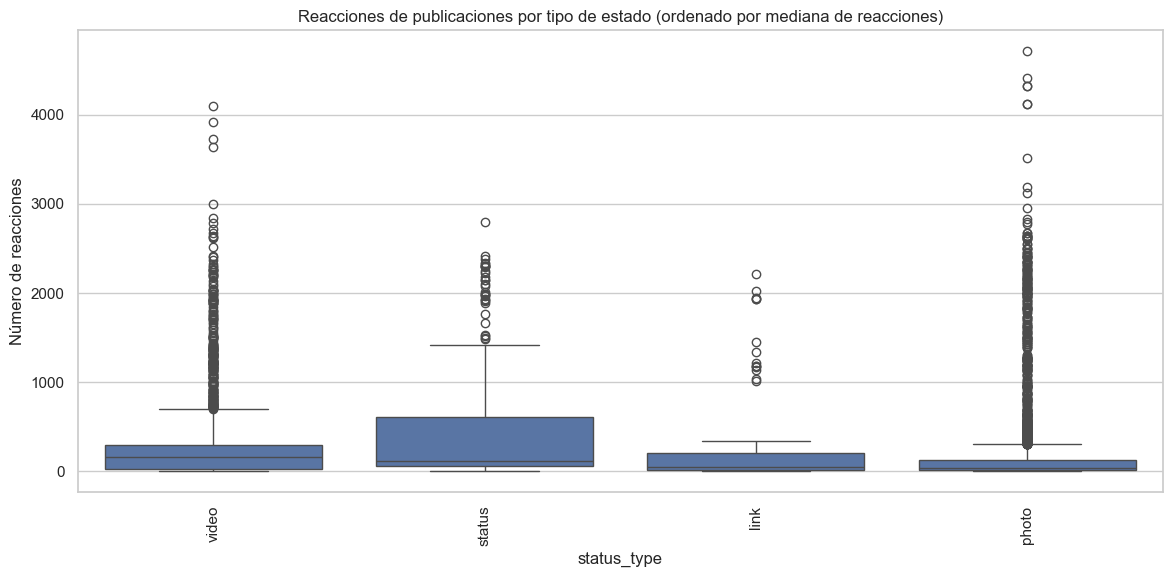

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean, x="status_type", y="num_reactions", order=order_by_reactions)
plt.title("Reacciones de publicaciones por tipo de estado (ordenado por mediana de reacciones)")
plt.xticks(rotation=90)
plt.ylabel("Número de reacciones")
plt.show()

## 3️⃣ Correlación
La correlación mide la **relación lineal entre variables**.
- +1 = relación positiva perfecta
- -1 = relación negativa perfecta
- 0 = no hay relación

Ejemplo: ¿las canciones con mayor *energy* también son más *populares*?

In [11]:
corr = df_clean[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()
corr

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


## 3️⃣➕ Scatter plots con línea de tendencia
A continuación se muestran diagramas de dispersión para pares de variables clave junto con la línea de regresión.
Se indica el coeficiente de correlación de Pearson (r) y su interpretación rápida:
- r > 0 → relación positiva
- r < 0 → relación negativa
- r ≈ 0 → sin relación lineal clara

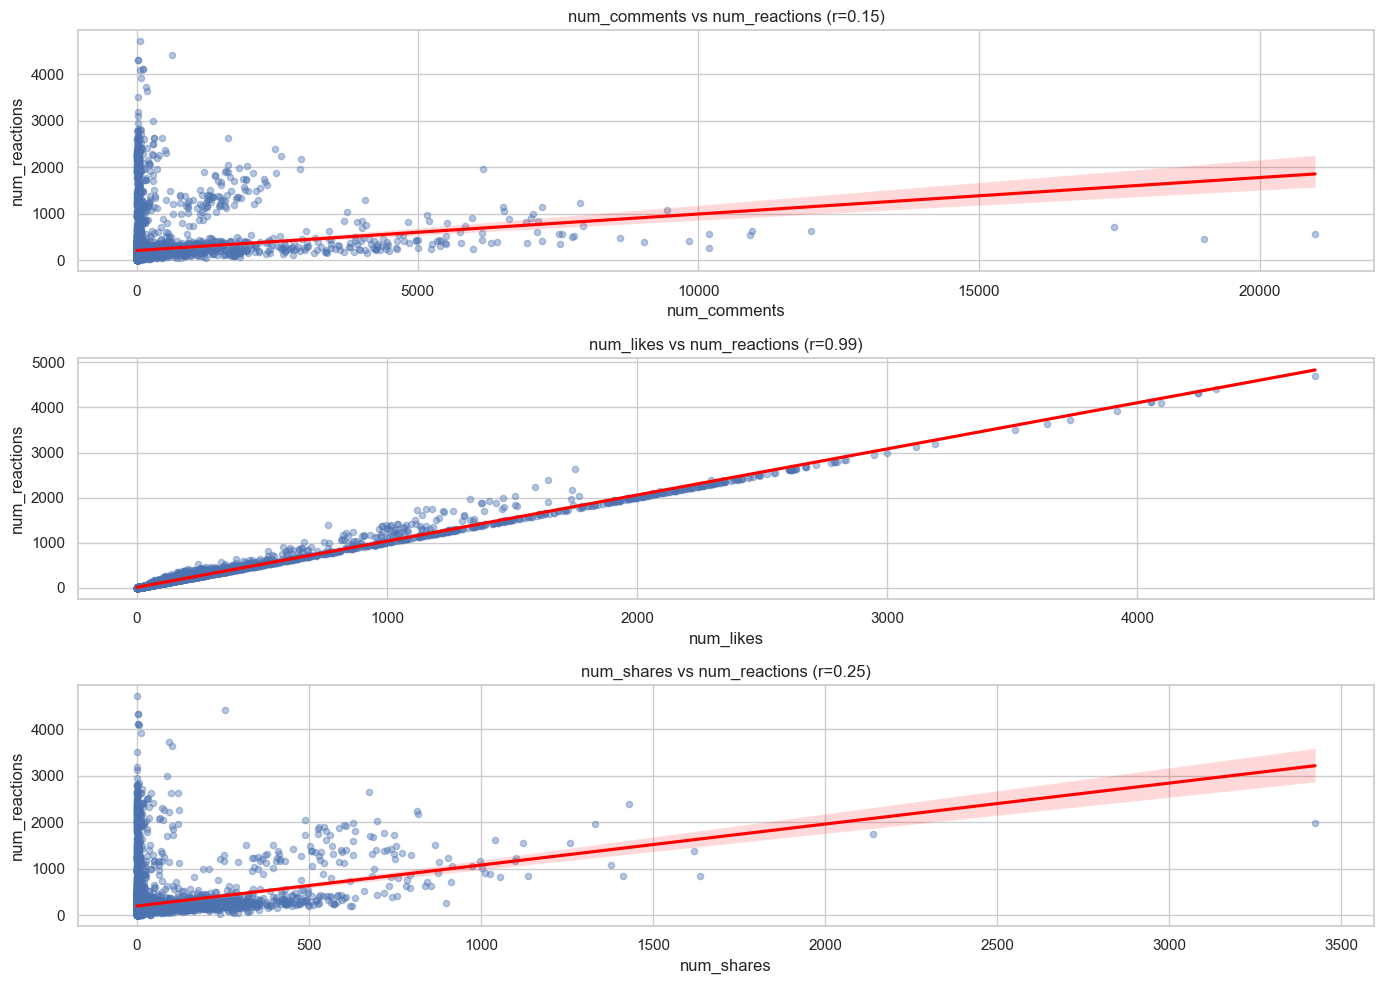


Interpretación rápida de correlaciones (scatter plots):
 - num_comments vs num_reactions: r=0.15 relación positiva (p=3.73e-37)
 - num_likes vs num_reactions: r=0.99 relación positiva (p=0)
 - num_shares vs num_reactions: r=0.25 relación positiva (p=1.64e-101)


In [16]:
# Scatter plots con líneas de tendencia y r (sin dependencia obligatoria de SciPy)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Intentar importar pearsonr; si no existe SciPy, se calcula r sin p-value
try:
    from scipy.stats import pearsonr  # type: ignore
    _has_scipy = True
except ImportError:  # SciPy no instalado
    _has_scipy = False

pairs = [
    ("num_comments", "num_reactions"),
    ("num_likes", "num_reactions"),
    ("num_shares", "num_reactions"),
]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
axes = axes.flatten()
interpretaciones_scatter = []

for ax, (x, y) in zip(axes, pairs):
    sub = df_clean[[x, y]].dropna()
    if len(sub) < 2:
        ax.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
        ax.set_axis_off()
        continue
    # Calcular correlación
    if _has_scipy:
        r, p = pearsonr(sub[x], sub[y])  # precisa p-value
    else:
        r = sub[x].corr(sub[y])  # Pearson por defecto
        p = float('nan')
    sns.regplot(data=sub, x=x, y=y, ax=ax,
                scatter_kws={'alpha': 0.4, 's': 20},
                line_kws={'color': 'red'})
    ax.set_title(f"{x} vs {y} (r={r:.2f})")
    # Interpretación básica
    if r > 0.1:
        sentido = 'positiva'
    elif r < -0.1:
        sentido = 'negativa'
    else:
        sentido = 'casi nula'
    if _has_scipy:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p={p:.3g})")
    else:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p=N/A, SciPy no instalado)")

plt.tight_layout()
plt.show()

print("\nInterpretación rápida de correlaciones (scatter plots):")
for linea in interpretaciones_scatter:
    print(" - " + linea)

if not _has_scipy:
    print("\nNota: Instala SciPy (pip install scipy) para obtener p-values.")

## 4️⃣ Mapas de Calor
Un **heatmap** nos permite visualizar la matriz de correlaciones.
Los colores indican si la relación es **positiva o negativa**.

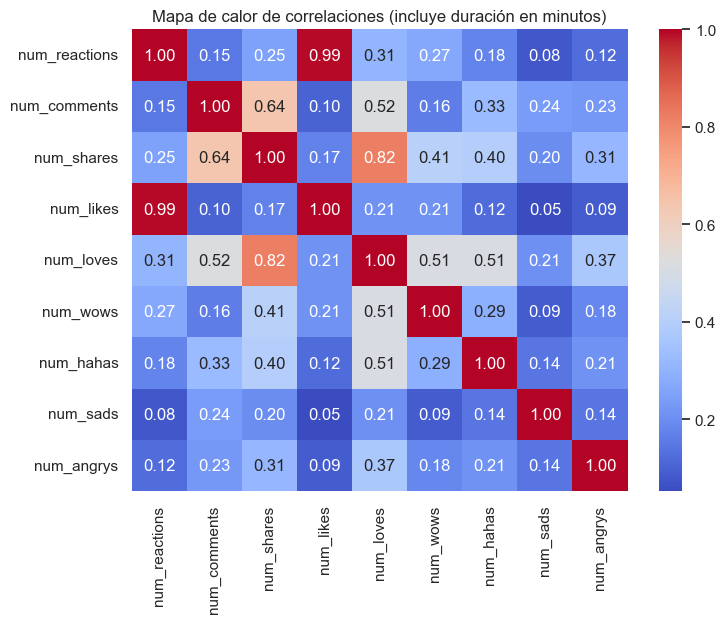

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

### 🧐 Interpretación del mapa de calor
El mapa de calor muestra la fuerza y dirección de la relación lineal entre las variables numéricas:
- danceability: Qué tan bailable es una pista (0–1).
- energy: Intensidad y actividad (0–1).
- valence: Positividad emocional (0–1).
- popularity: Popularidad (escala Spotify, típicamente 0–100).
- duration_min: Duración en minutos.

Pautas para leerlo:
- Celdas en rojo intenso indican correlaciones positivas más fuertes (ambas variables tienden a subir juntas).
- Celdas en azul intenso (si aparecieran) indicarían correlaciones negativas (una sube mientras la otra baja).
- Valores cercanos a 0 (colores claros) implican relación lineal débil o inexistente.

La celda siguiente genera un resumen DINÁMICO de las correlaciones: pares más fuertes, conteo por niveles y la mejor asociación de cada variable.

In [20]:
# 🔄 Resumen dinámico de la matriz de correlación
import pandas as pd
import numpy as np

if 'corr' not in globals():
    corr = df_clean[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()

# Obtener pares únicos (triángulo superior sin diagonal)
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        a, b = cols[i], cols[j]
        pares.append((a, b, corr.iloc[i, j]))

# Ordenar por magnitud absoluta
pares_ord = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

# Clasificar niveles
niveles = {
    'muy fuerte (|r| >= 0.7)': [],
    'fuerte (0.5 <= |r| < 0.7)': [],
    'moderada (0.3 <= |r| < 0.5)': [],
    'débil (0.1 <= |r| < 0.3)': [],
    'casi nula (|r| < 0.1)': []
}
for a,b,r in pares:
    ar = abs(r)
    if ar >= 0.7: niveles['muy fuerte (|r| >= 0.7)'].append((a,b,r))
    elif ar >= 0.5: niveles['fuerte (0.5 <= |r| < 0.7)'].append((a,b,r))
    elif ar >= 0.3: niveles['moderada (0.3 <= |r| < 0.5)'].append((a,b,r))
    elif ar >= 0.1: niveles['débil (0.1 <= |r| < 0.3)'].append((a,b,r))
    else: niveles['casi nula (|r| < 0.1)'].append((a,b,r))

# Mejor asociación para cada variable
mejor_por_var = {}
for v in cols:
    mejores = []
    for a,b,r in pares:
        if a == v or b == v:
            mejores.append((a if b == v else b, r))
    if mejores:
        mejor_por_var[v] = sorted(mejores, key=lambda x: abs(x[1]), reverse=True)[0]

print('=== PARES ORDENADOS POR |r| (top 5) ===')
for a,b,r in pares_ord[:5]:
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {a} vs {b}: r={r:.2f} ({signo})')

print('\n=== DISTRIBUCIÓN POR NIVELES ===')
for nivel, lista in niveles.items():
    print(f' {nivel}: {len(lista)} pares')

print('\n=== MEJOR ASOCIACIÓN POR VARIABLE ===')
for var,(otro,r) in mejor_por_var.items():
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {var} con {otro}: r={r:.2f} ({signo})')

# Tabla resumen opcional
res_df = pd.DataFrame(pares_ord, columns=['var_a','var_b','r'])
res_df.head()

=== PARES ORDENADOS POR |r| (top 5) ===
 - num_reactions vs num_likes: r=0.99 (positiva)
 - num_shares vs num_loves: r=0.82 (positiva)
 - num_comments vs num_shares: r=0.64 (positiva)
 - num_comments vs num_loves: r=0.52 (positiva)
 - num_loves vs num_wows: r=0.51 (positiva)

=== DISTRIBUCIÓN POR NIVELES ===
 muy fuerte (|r| >= 0.7): 2 pares
 fuerte (0.5 <= |r| < 0.7): 4 pares
 moderada (0.3 <= |r| < 0.5): 6 pares
 débil (0.1 <= |r| < 0.3): 20 pares
 casi nula (|r| < 0.1): 4 pares

=== MEJOR ASOCIACIÓN POR VARIABLE ===
 - num_reactions con num_likes: r=0.99 (positiva)
 - num_comments con num_shares: r=0.64 (positiva)
 - num_shares con num_loves: r=0.82 (positiva)
 - num_likes con num_reactions: r=0.99 (positiva)
 - num_loves con num_shares: r=0.82 (positiva)
 - num_wows con num_loves: r=0.51 (positiva)
 - num_hahas con num_loves: r=0.51 (positiva)
 - num_sads con num_comments: r=0.24 (positiva)
 - num_angrys con num_loves: r=0.37 (positiva)


,var_a,var_b,r
0,num_reactions,num_likes,0.994923
1,num_shares,num_loves,0.820000
2,num_comments,num_shares,0.640637
3,num_comments,num_loves,0.521223
4,num_loves,num_wows,0.508798


In [21]:
# 🗣️ Cinco oraciones de interpretación de la correlación
import numpy as np

if 'corr' not in globals():
    corr = df_clean[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()

# Obtener pares únicos
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pares.append((cols[i], cols[j], corr.iloc[i, j]))

# 1. Mayor correlación absoluta
pareja_top = max(pares, key=lambda x: abs(x[2]))
# 2. Menor correlación absoluta
pareja_min = min(pares, key=lambda x: abs(x[2]))
# 3. Variable con mayor suma de |r| (influencia global)
influencia = {}
for v in cols:
    influencia[v] = sum(abs(corr[v].drop(v)))
var_mas_rel = max(influencia.items(), key=lambda x: x[1])
var_menos_rel = min(influencia.items(), key=lambda x: x[1])
# 4. Media de correlaciones con popularity
if 'popularity' in cols:
    media_pop = corr['popularity'].drop('popularity').mean()
else:
    media_pop = float('nan')

sentencias = []
# Oración 1
sentencias.append(f"La relación más fuerte es entre {pareja_top[0]} y {pareja_top[1]} (r={pareja_top[2]:.2f}), indicando asociación {'positiva' if pareja_top[2]>0 else 'negativa'} clara.")
# Oración 2
sentencias.append(f"La relación más débil aparece entre {pareja_min[0]} y {pareja_min[1]} (r={pareja_min[2]:.2f}), prácticamente sin dependencia lineal.")
# Oración 3
sentencias.append(f"La variable con mayor conectividad global es {var_mas_rel[0]} (suma de |r|={var_mas_rel[1]:.2f}), actuando como eje en el conjunto.")
# Oración 4
sentencias.append(f"La variable más independiente relativa es {var_menos_rel[0]}, con menor suma de correlaciones absolutas ({var_menos_rel[1]:.2f}).")
# Oración 5
sentencias.append(f"En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r={media_pop:.2f}), sugiriendo que ningún rasgo único domina totalmente la popularidad.")

for s in sentencias:
    print("- " + s)

- La relación más fuerte es entre num_reactions y num_likes (r=0.99), indicando asociación positiva clara.
- La relación más débil aparece entre num_likes y num_sads (r=0.05), prácticamente sin dependencia lineal.
- La variable con mayor conectividad global es num_loves (suma de |r|=3.45), actuando como eje en el conjunto.
- La variable más independiente relativa es num_sads, con menor suma de correlaciones absolutas (1.14).
- En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r=nan), sugiriendo que ningún rasgo único domina totalmente la popularidad.


## ✅ Conclusiones
- Los boxplots ayudan a detectar géneros con mayor dispersión de duración o popularidad.
- La correlación muestra qué características musicales están más relacionadas entre sí.
- El heatmap facilita la interpretación visual de estas relaciones.

👉 Este tipo de análisis es esencial para entender tendencias en plataformas como **Spotify**.

In [23]:
# 🤖 Resumen automático de insights
import numpy as np
summary = []
if 'df_clean' in globals():
    # Top géneros por mediana de popularidad y duración
    order_by_reactions = df_clean.groupby('status_type')['num_reactions'].median().sort_values(ascending=False).index

    # Correlaciones fuertes (absolutas > 0.5)
    strong_corr = corr.copy()
    strong_pairs = []
    for i,col in enumerate(strong_corr.columns):
        for j,row in enumerate(strong_corr.index):
            if j <= i:
                continue
            val = strong_corr.loc[row,col]
            if abs(val) >= 0.5:
                strong_pairs.append((row,col,round(val,2)))
    # Outliers aproximados por género en duración (IQR)
    outlier_counts = {}
    for g, sub in df_clean.groupby('status_type'):
        q1 = sub['num_reactions'].quantile(0.25)
        q3 = sub['num_reactions'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outliers = sub[(sub['num_reactions'] < lower) | (sub['num_reactions'] > upper)]
        outlier_counts[g] = len(outliers)
    top_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    summary.append('=== INSIGHTS AUTOMÁTICOS ===')
    summary.append('\nTop 3 tipos de difusión por mediana de número de reacciones:')
    order_by_reactions = df_clean.groupby('status_type')['num_reactions'].median().sort_values(ascending=False)
    summary.extend([f'  - {g}: {v}' for g,v in order_by_reactions.items()])

    if strong_pairs:
        summary.append('\nParejas con correlación fuerte (|r| >= 0.5):')
        for a,b,v in strong_pairs:
            summary.append(f'  - {a} vs {b}: r={v}')
    else:
        summary.append('\nNo se detectaron correlaciones con |r| >= 0.5.')
    summary.append('\nGéneros con mayor número de outliers (duración):')
    for g,cnt in top_outliers:
        summary.append(f'  - {g}: {cnt} outliers')
else:
    summary.append('df_clean no está disponible. Ejecuta las celdas de preprocesamiento.')
print('\n'.join(summary))

=== INSIGHTS AUTOMÁTICOS ===

Top 3 tipos de difusión por mediana de número de reacciones:
  - video: 160.0
  - status: 120.0
  - link: 50.0
  - photo: 34.0

Parejas con correlación fuerte (|r| >= 0.5):
  - num_likes vs num_reactions: r=0.99
  - num_shares vs num_comments: r=0.64
  - num_loves vs num_comments: r=0.52
  - num_loves vs num_shares: r=0.82
  - num_wows vs num_loves: r=0.51
  - num_hahas vs num_loves: r=0.51

Géneros con mayor número de outliers (duración):
  - photo: 540 outliers
  - video: 224 outliers
  - status: 31 outliers
  - link: 14 outliers


In [24]:
# 📝 Interpretación detallada de los gráficos
interpretaciones = []

if 'df_clean' in globals():
    # Recalcular elementos clave para asegurar reproducibilidad
    import numpy as np
    # 1. Boxplot duración
    dur_median = df_clean.groupby('status_type')['num_reactions'].median().sort_values(ascending=False)
    top_dur_genres = dur_median.head(3)
    bottom_dur_genres = dur_median.tail(3)
    rango_dur = round(dur_median.max() - dur_median.min(), 2)
    interpretaciones.append('1) Reacciones por tipo de estado:')
    interpretaciones.append(f'   • Los tipos de estado con mayor mediana de reacciones (top 3) son: {", ".join([f"{g} ({round(v,2)})" for g,v in top_dur_genres.items()])}.')
    interpretaciones.append(f'   • Los tipos de estado con menor mediana de reacciones (últimos 3) son: {", ".join([f"{g} ({round(v,2)})" for g,v in bottom_dur_genres.items()])}.')
    interpretaciones.append(f'   • Diferencia aproximada entre la mediana más alta y la más baja: {rango_dur} reacciones.')
    interpretaciones.append('   • La presencia de puntos fuera de los “bigotes” indica outliers: estados inusualmente populares o impopulares.')

    # 2. Matriz de correlación / Heatmap
    vars_corr = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
    corr_local = df_clean[vars_corr].corr()
    pares = []
    for i, a in enumerate(vars_corr):
        for j, b in enumerate(vars_corr):
            if j <= i:  # evitar duplicados y diagonales
                continue
            pares.append((a, b, corr_local.loc[a, b]))
    pares_orden = sorted(pares, key=lambda x: abs(x[2]), reverse=True)
    top_corr = [(a, b, round(v, 2)) for a, b, v in pares_orden[:3]]
    interpretaciones.append('\n3) Correlaciones (tabla y heatmap):')
    for a, b, v in top_corr:
        sentido = 'positiva' if v > 0 else 'negativa'
        interpretaciones.append(f'   • {a} vs {b}: r={v} ({sentido}).')
    interpretaciones.append('   • Valores cercanos a 0 indican relación débil; colores más intensos en el heatmap resaltan asociaciones fuertes.')

    # 3. Outliers (duración) – reutilizamos lógica IQR
    outlier_info = []
    for g, sub in df_clean.groupby('status_type'):
        q1 = sub['num_reactions'].quantile(0.25)
        q3 = sub['num_reactions'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = sub[(sub['num_reactions'] < lower) | (sub['num_reactions'] > upper)]
        if len(sub) > 0:
            outlier_info.append((g, len(outliers), round(100 * len(outliers) / len(sub), 1)))
    outlier_info_sorted = sorted(outlier_info, key=lambda x: x[1], reverse=True)[:3]
    interpretaciones.append('\n4) Outliers de num_reactions:')
    for g, c, pct in outlier_info_sorted:
        interpretaciones.append(f'   • {g}: {c} outliers (~{pct}% del tipo de difusión).')
    interpretaciones.append('   • Un porcentaje alto puede indicar subgéneros mixtos o variabilidad estilística.')

    # 4. Síntesis global
    interpretaciones.append('\n4) Síntesis:')
    interpretaciones.append('   • Los boxplots permiten detectar tipos de difusión extremos en número de reacciones rápidamente.')
    interpretaciones.append('   • Las correlaciones identifican combinaciones de características que podrían influir juntas.')
    interpretaciones.append('   • Los outliers ayudan a focalizar posibles casos especiales para análisis cualitativo.')
else:
    interpretaciones.append('df_clean no está definido. Ejecuta las celdas anteriores antes de interpretar.')

print('\n'.join(interpretaciones))

1) Reacciones por tipo de estado:
   • Los tipos de estado con mayor mediana de reacciones (top 3) son: video (160.0), status (120.0), link (50.0).
   • Los tipos de estado con menor mediana de reacciones (últimos 3) son: status (120.0), link (50.0), photo (34.0).
   • Diferencia aproximada entre la mediana más alta y la más baja: 126.0 reacciones.
   • La presencia de puntos fuera de los “bigotes” indica outliers: estados inusualmente populares o impopulares.

3) Correlaciones (tabla y heatmap):
   • num_reactions vs num_likes: r=0.99 (positiva).
   • num_shares vs num_loves: r=0.82 (positiva).
   • num_comments vs num_shares: r=0.64 (positiva).
   • Valores cercanos a 0 indican relación débil; colores más intensos en el heatmap resaltan asociaciones fuertes.

4) Outliers de num_reactions:
   • photo: 540 outliers (~12.6% del tipo de difusión).
   • video: 224 outliers (~9.6% del tipo de difusión).
   • status: 31 outliers (~8.5% del tipo de difusión).
   • Un porcentaje alto puede in